# I FORGOT to Remove PID from the first model. NEED TO REMOVE and re model

## Load Packages and Data

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

from tqdm import tqdm


# this extension properly formats a cell after it is run
# !{sys.executable} -m pip install nb_black # UNCOMMENT TO INSTALL
%load_ext nb_black
%matplotlib inline

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)

# Set the maximum number of columns to 200
pd.set_option("display.max_columns", 200)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
# Load Data
housing_corr = pd.read_csv(
    "../data/housing_corr.csv"
)  # 13 features removed because of colinearity

<IPython.core.display.Javascript object>

In [4]:
housing_corr

,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Age,RemodAge,TotalSF,Remodeled,TotalPorchSF,TotalBath,MSSubClass_cat,Street_type,Neighborhood_st
0,909176150,126000,30,RL,0.0,7890,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,CBlock,3,3,1,238.0,0.0,618.0,GasA,2,Y,SBrkr,0,1.0,0.0,0,2,1,2,4,Typ,1,Detchd,1,399.0,3,Y,0,0,0,166,0,3,2010,WD,Normal,71,60,1712.0,1,166,2.0,subclass30,AVE,SWISU_HAYWARD_AVE
1,905476230,139500,120,RL,42.0,4235,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,2,CBlock,4,3,2,552.0,393.0,104.0,GasA,2,Y,SBrkr,0,1.0,0.0,0,2,1,3,5,Typ,0,Attchd,3,266.0,3,Y,0,105,0,0,0,2,2009,WD,Normal,25,25,2098.0,0,105,3.0,subclass120,ST,Edwards_WEST_ST
2,911128020,124900,30,C (all),60.0,6060,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,Hip,CompShg,MetalSd,MetalSd,None,0.0,2,BrkTil,3,3,1,737.0,0.0,100.0,GasA,4,Y,SBrkr,0,0.0,0.0,0,2,1,3,5,Typ,0,Detchd,1,216.0,3,N,154,0,42,0,0,11,2007,WD,Normal,77,0,1838.0,1,128,1.0,subclass30,ST,IDOTRR_S_2ND_ST
3,535377150,114000,70,RL,80.0,8146,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,BrkTil,2,3,1,0.0,0.0,405.0,GasA,3,Y,SBrkr,322,0.0,0.0,0,2,1,2,6,Typ,0,Detchd,1,281.0,3,N,0,0,168,111,0,5,2009,WD,Normal,109,6,1444.0,1,279,1.0,subclass70,AVE,OldTown_DOUGLAS_AVE
4,534177230,227000,60,RL,70.0,8400,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,PConc,4,3,1,643.0,0.0,167.0,GasA,4,Y,SBrkr,855,1.0,0.0,1,3,1,3,6,Typ,0,Attchd,3,528.0,3,Y,0,45,0,0,0,11,2009,WD,Normal,8,8,2475.0,0,45,3.5,subclass60,AVE,NWAmes_FILLMORE_AVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,903205040,121000,30,RL,0.0,8854,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,BrkTil,3,3,1,0.0,0.0,952.0,Grav,1,N,FuseF,0,0.0,0.0,0,2,1,1,4,Typ,1,Detchd,1,192.0,2,P,0,98,0,40,0,5,2009,WD,Normal,93,59,1904.0,1,138,1.0,subclass30,AVE,BrkSide_RIDGEWOOD_AVE
2554,905402060,139600,20,RL,0.0,13680,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,2,Slab,0,0,0,0.0,0.0,0.0,GasA,4,Y,FuseA,0,0.0,0.0,0,4,1,2,8,Min2,1,Attchd,1,452.0,3,Y,0,0,0,0,0,6,2009,WD,Normal,54,54,1733.0,0,0,2.0,subclass20,CIR,Edwards_MARY_CIR
2555,909275030,145000,90,RH,82.0,6270,Pave,No_Alley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,CBlock,3,3,1,284.0,0.0,717.0,GasA,2,N,FuseA,1001,0.0,0.0,0,4,2,2,8,Typ,0,2Types,1,871.0,3,Y,0,0,0,0,0,8,2007,WD,Normal,58,57,3003.0,1,0,2.0,subclass90,DR,Crawfor_SUNSET_DR
2556,907192040,217500,60,RL,0.0,8826,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,2,PConc,4,3,1,841.0,0.0,144.0,GasA,4,Y,SBrkr,857,1.0,0.0,1,3,1,3,7,Typ,1,Attchd,3,486.0,3,Y,193,96,0,0,0,7,2007,WD,Normal,7,7,2827.0,0,96,3.5,subclass60,BLVD,CollgCr_CLEMENS_BLVD


<IPython.core.display.Javascript object>

## Train Test Split

In [5]:
X = housing_corr.loc[:, housing_corr.columns != "SalePrice"]
y = housing_corr.loc[:, "SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=housing_corr["Neighborhood"]
)

<IPython.core.display.Javascript object>

## One Hot Encoding for Categorical Values

In [6]:
# Removing Neighborhood Street Column and will re-introduce later in a more helpful form.
X_train = X_train.drop("Neighborhood_st", axis=1)
X_test = X_test.drop("Neighborhood_st", axis=1)

<IPython.core.display.Javascript object>

In [7]:
# In order to do regression, I need to turn categorical values into numerical values
X_train.dtypes

PID                 int64
MSSubClass          int64
MSZoning           object
LotFrontage       float64
LotArea             int64
Street             object
Alley              object
LotShape           object
LandContour        object
Utilities          object
LotConfig          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
BldgType           object
HouseStyle         object
OverallQual         int64
OverallCond         int64
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType         object
MasVnrArea        float64
ExterCond           int64
Foundation         object
BsmtQual            int64
BsmtCond            int64
BsmtExposure        int64
BsmtFinSF1        float64
BsmtFinSF2        float64
BsmtUnfSF         float64
Heating            object
HeatingQC           int64
CentralAir         object
Electrical         object
2ndFlrSF            int64
BsmtFullBath

<IPython.core.display.Javascript object>

In [8]:
## DUMMIFY categorical columns into numerical values 0 or 1 ##

# List categorical columns to be dummified for train/test
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Dummify the categorical columns in both train/test set
train_dummies = pd.get_dummies(X_train, columns=cat_cols)
test_dummies = pd.get_dummies(X_test, columns=cat_cols)

# Ensure the same dummy columns are present in both train and test sets
train_dummies, test_dummies = train_dummies.align(test_dummies, join='left', axis=1)

# Fill any missing columns in the test set with zeros
test_dummies.fillna(0, inplace=True)


<IPython.core.display.Javascript object>

In [9]:
# Did it work? yes!
train_dummies

,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,2ndFlrSF,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,Age,RemodAge,TotalSF,Remodeled,TotalPorchSF,TotalBath,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No_Alley,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,...,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageType_ParkingSpace,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_cat_subclass120,MSSubClass_cat_subclass160,MSSubClass_cat_subclass180,MSSubClass_cat_subclass190,MSSubClass_cat_subclass20,MSSubClass_cat_subclass30,MSSubClass_cat_subclass40,MSSubClass_cat_subclass45,MSSubClass_cat_subclass50,MSSubClass_cat_subclass60,MSSubClass_cat_subclass70,MSSubClass_cat_subclass75,MSSubClass_cat_subclass80,MSSubClass_cat_subclass85,MSSubClass_cat_subclass90,Street_type_AVE,Street_type_BLVD,Street_type_CIR,Street_type_CT,Street_type_DR,Street_type_EAST,Street_type_LN,Street_type_PKWY,Street_type_PL,Street_type_RD,Street_type_ST,Street_type_WAY
1165,903231090,50,0.0,6240,6,5,0.0,2,3,3,1,52.0,0.0,809.0,3,548,1.0,0.0,1,3,1,2,6,1,1,528.0,3,225,0,84,0,0,3,2007,69,57,2270.0,1,84,2.5,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1930,902406020,20,65.0,9750,5,6,164.0,2,3,3,1,200.0,0.0,784.0,3,0,1.0,0.0,0,2,1,1,5,0,1,308.0,3,0,0,0,0,0,6,2008,49,49,1968.0,0,0,2.0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0

<IPython.core.display.Javascript object>

In [10]:
# Lot's of Columns now that we one-hot encoded!
print(train_dummies.shape)
print(test_dummies.shape)

(1790, 250)
(768, 250)


<IPython.core.display.Javascript object>

In [11]:
# Triple Check that there are no object values
train_strings = train_dummies.select_dtypes(include=["object"]).columns
test_strings = test_dummies.select_dtypes(include=["object"]).columns
print(train_strings)
print(test_strings)

Index([], dtype='object')
Index([], dtype='object')


<IPython.core.display.Javascript object>

## Define Model and Variables 

In [12]:
# Define Model and Variables
initial_model = GradientBoostingRegressor()
X_train = train_dummies
y_train = y_train
X_test = test_dummies
y_test = y_test

<IPython.core.display.Javascript object>

## Remove Columns with just 0's or few observations

In [17]:
all_zero_cols_train = []
for col in X_train.columns:
    if (X_train[col] == 0).all():
        all_zero_cols.append(col)
print(all_zero_cols_train)

all_zero_cols_test = []
for col in X_test.columns:
    if (X_test[col] == 0).all():
        all_zero_cols.append(col)
print(all_zero_cols_test)

[]
[]


<IPython.core.display.Javascript object>

In [34]:
# None of the columns have all o's
# BUT some of the dummified columns have a very small amount of data

col_sums = X_train.iloc[:, 45:].sum()
col_sums_filt = col_sums[col_sums < 20]
print(col_sums_filt.sort_values())

Condition2_RRAn                1
Heating_OthW                   1
RoofMatl_Metal                 1
RoofMatl_Roll                  1
Condition2_RRAe                1
Condition2_PosA                1
Functional_Sal                 1
GarageType_ParkingSpace        1
Exterior2nd_PreCast            1
Heating_Floor                  1
Exterior1st_CBlock             1
SaleType_VWD                   1
Exterior1st_ImStucc            1
Utilities_NoSewr               1
Exterior1st_PreCast            1
SaleType_ConLw                 2
Condition2_Artery              2
Electrical_FuseP               2
SaleCondition_AdjLand          2
Condition2_RRNn                2
HouseStyle_2.5Fin              2
Exterior1st_AsphShn            2
Condition1_RRNe                2
Foundation_Wood                3
RoofMatl_WdShake               3
Exterior2nd_Stone              3
Exterior2nd_AsphShn            3
Condition2_PosN                3
SaleType_ConLI                 3
SaleCondition_Alloca           3
Heating_Gr

<IPython.core.display.Javascript object>

In [39]:
# Remove all the dummified columns that were only 20 or less observations.
# out of the total 1790 observations of the train set

small_dumb_cols = list(col_sums_filt.index)

X_train.drop(columns=small_dumb_cols, inplace=True)
X_test.drop(columns=small_dumb_cols, inplace=True)

<IPython.core.display.Javascript object>

In [40]:
# Dropped ~78 columns
print(X_train.shape)
print(X_test.shape)

(1790, 172)
(768, 172)


<IPython.core.display.Javascript object>

## Gradient Boosting Regression Model

In [43]:
X_train

,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,2ndFlrSF,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,Age,RemodAge,TotalSF,Remodeled,TotalPorchSF,TotalBath,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_No_Alley,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition2_Norm,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Heating_GasA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No_Garage,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_cat_subclass120,MSSubClass_cat_subclass160,MSSubClass_cat_subclass190,MSSubClass_cat_subclass20,MSSubClass_cat_subclass30,MSSubClass_cat_subclass50,MSSubClass_cat_subclass60,MSSubClass_cat_subclass70,MSSubClass_cat_subclass80,MSSubClass_cat_subclass85,MSSubClass_cat_subclass90,Street_type_AVE,Street_type_BLVD,Street_type_CIR,Street_type_CT,Street_type_DR,Street_type_PL,Street_type_RD,Street_type_ST
1165,903231090,50,0.0,6240,6,5,0.0,2,3,3,1,52.0,0.0,809.0,3,548,1.0,0.0,1,3,1,2,6,1,1,528.0,3,225,0,84,0,0,3,2007,69,57,2270.0,1,84,2.5,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1930,902406020,20,65.0,9750,5,6,164.0,2,3,3,1,200.0,0.0,784.0,3,0,1.0,0.0,0,2,1,1,5,0,1,308.0,3,0,0,0,0,0,6,2008,49,49,1968.0,0,0,2.0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
722,528118040,60,118.0,13654,9,5,365.0,2,5,3,3,0.0,0.0,1704.0,4,1036,0.0,0.0,1,4,1,4,9,1,3,814.0,3,282,55,0,0,0,5,2007,2,1,4462.0,1,55,2.5,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
654,5341

<IPython.core.display.Javascript object>

In [44]:
# Fit Model
initial_model.set_params(verbose=1)
initial_model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1  4767157733.0768            1.23s
         2  4092486774.1820            1.13s
         3  3519575875.2904            1.10s
         4  3054367111.5622            1.07s
         5  2657539293.3090            1.03s
         6  2332373047.0640            0.98s
         7  2054475418.9947            0.93s
         8  1817606891.5781            0.89s
         9  1618999049.7384            0.85s
        10  1454084513.2555            0.81s
        20   654438443.8702            0.62s
        30   411813093.8971            0.52s
        40   313772453.6567            0.43s
        50   263518663.3324            0.35s
        60   230982378.3223            0.28s
        70   207830415.3002            0.21s
        80   192592977.3338            0.14s
        90   181203110.2231            0.07s
       100   171212516.3868            0.00s


GradientBoostingRegressor(verbose=1)

<IPython.core.display.Javascript object>

## Evaluate the Model

In [45]:
initial_scores = cross_val_score(
    initial_model, X_train, y_train, 
    cv=5, 
    scoring="neg_mean_squared_error", 
    verbose=2
)
print("Initial Model RMSE: ", np.sqrt(-1 * np.mean(initial_scores)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1  4827884258.6348            0.92s
         2  4145223008.6154            0.91s
         3  3554417271.7804            0.90s
         4  3082089358.8273            0.88s
         5  2677092454.2684            0.85s
         6  2343877197.2158            0.82s
         7  2066124785.0758            0.78s
         8  1825780132.4434            0.75s
         9  1624807416.9909            0.72s
        10  1456809439.6265            0.69s
        20   623476771.9001            0.52s
        30   382528749.7607            0.43s
        40   286381228.7656            0.36s
        50   235307094.4193            0.29s
        60   205820466.7760            0.23s
        70   182783752.8959            0.17s
        80   166694956.3479            0.11s
        90   154307292.1984            0.06s
       100   143825672.0779            0.00s
[CV] END .................................................... total time=   0.6s
      Iter       T

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


        20   604833000.9352            0.43s
        30   384289805.3285            0.38s
        40   289472281.5293            0.33s
        50   237917884.4961            0.27s
        60   208205805.4303            0.22s
        70   186828236.8053            0.16s
        80   171937579.3812            0.11s
        90   160393557.7370            0.05s
       100   150604753.2431            0.00s
[CV] END .................................................... total time=   0.6s
      Iter       Train Loss   Remaining Time 
         1  4965096900.7811            0.56s
         2  4253029215.4981            0.57s
         3  3642049823.4351            0.56s
         4  3142182765.4902            0.55s
         5  2720318588.4958            0.54s
         6  2368186695.0979            0.53s
         7  2074452588.1305            0.52s
         8  1823929685.2615            0.51s
         9  1618398082.8220            0.51s
        10  1440445484.8215            0.50s
        20   61684

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished


<IPython.core.display.Javascript object>

In [47]:
print("Best hyperparameters: ", tuned_model.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}


<IPython.core.display.Javascript object>

## Tuning the Hyper Parameters

In [46]:
## GridSearchCV

param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.5],
}

tuned_model = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1, # use all available CPU cores
    verbose=3,
)
tuned_model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

<IPython.core.display.Javascript object>

In [52]:
tuned_model.cv_results_

{'mean_fit_time': array([ 0.64578848,  3.27984695,  6.9019043 ,  1.12810736,  5.852459  ,
        10.98695645,  1.59971342,  7.59180532, 15.26377568,  0.64033761,
         3.28788366,  6.49866781,  1.11035819,  5.35179038, 10.69921274,
         1.52428641,  7.492556  , 15.35708361,  0.63563247,  3.31778374,
         6.71472964,  1.08331914,  5.36654663, 10.71180086,  1.51120939,
         7.60285335,  7.07622213]),
 'std_fit_time': array([0.00695421, 0.10765159, 0.09414512, 0.02428688, 0.07990608,
        0.05068931, 0.03115647, 0.09906012, 0.06943567, 0.00808032,
        0.04247786, 0.05836663, 0.03381503, 0.05153644, 0.09598884,
        0.02788615, 0.04831138, 0.09429312, 0.01328796, 0.05244107,
        0.08118848, 0.01616865, 0.10836146, 0.05941286, 0.02816268,
        0.05151905, 0.05259171]),
 'mean_score_time': array([0.00345006, 0.00538144, 0.00682554, 0.00432687, 0.00861077,
        0.01193862, 0.00340409, 0.01005573, 0.01772957, 0.0037508 ,
        0.00544634, 0.00641074, 0.002

<IPython.core.display.Javascript object>

## Vizualizing Tuned Parameters

#### n_estimators vs. max_depth
Each cell of the heatmap represents the mean test score obtained by the model when it was trained. The color of each cell indicates the magnitude of the mean test score, where red represents higher mean test scores and blue represents lower mean test scores. A higher test score is better; so the combination of hyperparameters `max_depth=5` and `n_estimators=1000` is the optimize selection.

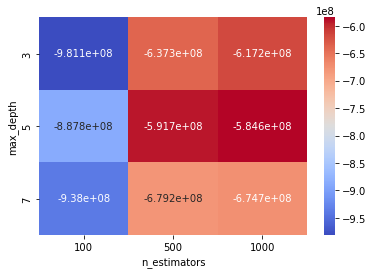

<IPython.core.display.Javascript object>

In [60]:
results = pd.DataFrame(tuned_model.cv_results_)
table = pd.pivot_table(
    results,
    values="mean_test_score",
    index="param_max_depth",
    columns="param_n_estimators",
)
sns.heatmap(
    table,
    annot=True,
    fmt=".4g",
    cmap="coolwarm",
    cbar_kws={"format": ticker.ScalarFormatter(useMathText=False)},
)
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

#### learning_rate vs Mean Test Score
UNSURE HOW TO INTERPRET THIS...but .1 is the best?

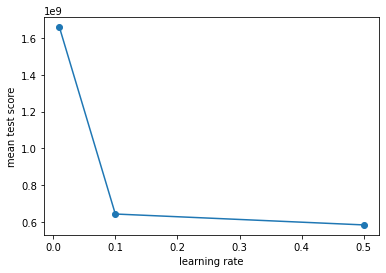

<IPython.core.display.Javascript object>

In [50]:
learning_rates = [0.01, 0.1, 0.5]
scores = [
    -tuned_model.cv_results_["mean_test_score"][i] for i in range(len(learning_rates))
]

plt.plot(learning_rates, scores, "-o")
plt.xlabel("learning rate")
plt.ylabel("mean test score")
plt.show()

## Evaluate the tuned model

In [61]:
tuned_scores = cross_val_score(
    tuned_model,
    X_train,
    y_train,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=2,
    n_jobs=-1,  # use all available CPU cores
)
print("Tuned Model RMSE: ", np.sqrt(-1 * np.mean(tuned_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Tuned Model RMSE:  24362.268901091084


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.1min finished


<IPython.core.display.Javascript object>

In [62]:
# Make predictions on the test data
y_pred = tuned_model.predict(X_test)

<IPython.core.display.Javascript object>

In [64]:
# Evaluate the model on the test data
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R-squared: ", r2_score(y_test, y_pred))

Test RMSE:  20744.29705627905
Test R-squared:  0.9238611061828883


<IPython.core.display.Javascript object>

## Feature Engineering: Street Grouping
#### Function from Creating_test_train notbook with a few changes

In [87]:
# Adding Neighborhood street back to df
streets = housing_corr[["PID", "Neighborhood_st", "SalePrice"]]

train_dummies_w_streets = pd.merge(train_dummies, streets, how="left", on="PID")
test_dummies_w_streets = pd.merge(test_dummies, streets, how="left", on="PID")

<IPython.core.display.Javascript object>

In [88]:
## Group Streets by Sale Price ##

# creating a function to create groups based on mean sale price of streets in each
# neighborhood of the training df and adds a new column with the groups created
# It then uses the groups created using the training dataframe and creates a new column
# in the testing dataframe by mapping these groups.  This will result in missing values
# If there is a street neighborhood combination that was in the training dataset but 
# not the testing dataset


def group_neighbor_streets_by_saleprice(
    traindf=train_dummies_w_streets, testdf=test_dummies_w_streets, num_quantiles=10  # notice the difference in this line!!
):
    # Calculate the mean sale price for each street in the training df
    street_prices = traindf.groupby("Neighborhood_st")["SalePrice"].mean()
    
    # Group the streets into the specified number of quantiles based on sale price
    labels = [f"group_{i+1}" for i in range(num_quantiles)]
    groups = pd.qcut(street_prices, q=num_quantiles, labels=range(1, num_quantiles + 1))
    
    # Create a dictionary that maps each street name to its corresponding sale price group label
    street_group_dict = dict(zip(street_prices.index, groups))
    
    # Add a new column to the training dataframe with the street price groups
    traindf["StreetPriceGroup"] = traindf["Neighborhood_st"].map(street_group_dict)
    
    # Add a new column to the testing dataframe with the street price groups
    testdf["StreetPriceGroup"] = testdf["Neighborhood_st"].map(street_group_dict)
    return street_group_dict


<IPython.core.display.Javascript object>

In [90]:
# the num of quantiles can be changed and it is assigned to d which is the dictionary that
# will be used to fill in the missing values

d = group_neighbor_streets_by_saleprice(
    traindf=train_dummies_w_streets,  # the difference here as well!!
    testdf=test_dummies_w_streets,  # the difference here as well!!
    num_quantiles=10,
)

<IPython.core.display.Javascript object>

In [92]:
## Supporting Function to group_neighbor_streets_by_saleprice to FILL_NA's ##

# Dictionary stores missing values in the test df with another group in the same neighborhood


def fill_na(testdf=test_dummies_w_streets, d={}):  # DIFFERENT HERE TOO
    # Extract the first part of the string in the "Neighborhood_st" column
    testdf["Neighborhood_prefix"] = testdf["Neighborhood_st"].map(
        lambda x: x.split("_")[0]
    )

    # Create a new dict that only contains the neighborhood
    new_dict = {k.split("_")[0]: v for k, v in d.items()}

    # Create a list of PIDs with missing StreetPriceGroup values
    na_pid_list = testdf[testdf["StreetPriceGroup"].isna()]["PID"].tolist()

    # Create a Boolean mask to filter the DataFrame
    mask = testdf["PID"].isin(na_pid_list)

    # Apply the dictionary mapping only to the filtered rows
    testdf.loc[mask, "StreetPriceGroup"] = testdf[mask]["Neighborhood_prefix"].map(
        new_dict
    )

    # Drop the column since there is no more use for it
    testdf.drop("Neighborhood_prefix", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [94]:
fill_na(test_dummies_w_streets, d)

<IPython.core.display.Javascript object>

In [95]:
# Remove the column that was used to create groupings
train_dummies_w_streets.drop("Neighborhood_st", axis=1, inplace=True)
test_dummies_w_streets.drop("Neighborhood_st", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
# Looks like PID should be removed and SalePrice moved to the first column
train_dummies_w_streets

In [97]:
# Remove PID and move SalePrice to first column
# I need to do this in the future and save the csv's after so we dont have to do this each time

# TRAIN
train_dummies_w_streets = train_dummies_w_streets.iloc[
    :,
    train_dummies_w_streets.columns.tolist().index("SalePrice") : (
        train_dummies_w_streets.columns.tolist().index("SalePrice") + 1
    ),
].join(train_dummies_w_streets.drop(columns=["SalePrice", "PID"]))

# TEST
test_dummies_w_streets = test_dummies_w_streets.iloc[
    :,
    test_dummies_w_streets.columns.tolist().index("SalePrice") : (
        test_dummies_w_streets.columns.tolist().index("SalePrice") + 1
    ),
].join(test_dummies_w_streets.drop(columns=["SalePrice", "PID"]))

<IPython.core.display.Javascript object>

In [105]:
# One Hot Encode it.

# List categorical columns to be dummified for train/test
cat_cols = ["StreetPriceGroup"]

# Dummify the categorical columns in both train/test set
train_dummies_w_streets2 = pd.get_dummies(train_dummies_w_streets, columns=cat_cols)
test_dummies_w_streets2 = pd.get_dummies(test_dummies_w_streets, columns=cat_cols)

# Ensure the same dummy columns are present in both train and test sets
train_dummies_w_streets2, test_dummies_w_streets2 = train_dummies_w_streets2.align(
    test_dummies_w_streets2, join="left", axis=1
)

# Fill any missing columns in the test set with zeros
test_dummies_w_streets2.fillna(0, inplace=True)

<IPython.core.display.Javascript object>

## Same processing as before

In [113]:
# Define Model and Variables
initial_model2 = GradientBoostingRegressor()
X_train2 = train_dummies_w_streets2
y_train2 = y_train.copy()
X_test2 = test_dummies_w_streets2
y_test2 = y_test.copy()

# Drop columns with less than 20 observations in it's column
col_sums2 = X_train2.iloc[:, 45:].sum()
col_sums_filt2 = col_sums2[col_sums2 < 20]

small_dumb_cols2 = list(col_sums_filt2.index)

X_train2.drop(columns=small_dumb_cols2, inplace=True)
X_test2.drop(columns=small_dumb_cols2, inplace=True)

<IPython.core.display.Javascript object>

## Model

In [ ]:
# initial_model.set_params(verbose=1)
# initial_model.fit(X_train, y_train)
# initial_scores = cross_val_score(
#     initial_model, X_train, y_train, 
#     cv=5, 
#     scoring="neg_mean_squared_error", 
#     verbose=2
# )
# print("Initial Model RMSE: ", np.sqrt(-1 * np.mean(initial_scores)))

## YE OLD CODE DUMP

In [ ]:
# k-fold cross-validation

# Create the Gradient Boosted Regression model and evaluate it using k-fold cross-validation
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

print("MSE scores:", mse_scores)
print("R-squared scores:", r2_scores)

The output shows the MSE and R-squared scores for each fold of the cross-validation. 
The MSE scores range from 322,746,634 to 949,124,370 while the R-squared scores range from 0.8501 to 0.9400. 

These scores indicate how well the model is performing on the testing data, with higher R-squared scores and lower MSE scores indicating better performance. 

The fact that the R-squared scores are relatively high and the MSE scores are relatively low suggests that the model is performing well on the data.

## Tuning

In [ ]:
def tune_gbm(learning_rate, max_depth):
    gbm = GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=10000, max_depth=max_depth
    )
    gbm.fit(X_train, y_train)

    return gbm

def demo_gbm_tuning(model, start=0, end=10000, training_curve=True):
    """
    This function takes a GBM regression model model as input and generates a 
    performance visualization of the model using the test dataset (X_test and y_test). 
    The function calculates the mean squared error (MSE) on both the training and test 
    datasets using a generator that iteratively predicts the targets for different numbers of estimators. 
    The start and end arguments control the range of the x-axis (i.e., the number of estimators), 
    and the training_curve argument controls whether to show the training curve or not. 
    The function also prints the best test score and the corresponding number of estimators.
    """
    gen_train = model.staged_predict(X_train)
    gen_test = model.staged_predict(X_test)

    trainMSE = []
    testMSE = []
    steps = range(1, 10001)
    for n in tqdm(steps):
        y_pred_train = next(gen_train)
        y_pred_test = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, y_train))
        testMSE.append(mean_squared_error(y_pred_test, y_test))

    print(
        "The best test score is {:.2f} at the step {}".format(
            min(testMSE), np.argmin(testMSE) + 1
        )
    )
    print("-" * 50)
    plt.plot(range(start, end), testMSE[start:end], label="test")
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end], label="train")
    plt.legend()
    plt.show()


In [ ]:
learning_rate = 0.001
max_depth = 4

model1 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000  # change start and end to zoom in

demo_gbm_tuning(model1, start, end)

The goal is to find the optimal number of estimators where the blue line is at its lowest point while the orange line is also decreasing or leveling off. This will ensure that the model is not overfitting and is generalizing well to new data.

The curve with the lowest test MSE represents the best-performing learning rate.

You can also look at the shape of the curves to gain insight into the behavior of the model. If the curves are flat or increasing, it may indicate that the model is overfitting or underfitting the data. If the curves are decreasing and plateauing, it may suggest that the model is performing well and additional tuning may not be necessary.

In [ ]:
learning_rate = 0.05
max_depth = 4

model2 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000

demo_gbm_tuning(model2, start, end)

In [ ]:
learning_rate = 0.01
max_depth = 4

model2 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000

demo_gbm_tuning(model2, start, end)

In [ ]:
top_n = 20

sorted_importance = sorted(
    zip(X_train.columns, gbm.feature_importances_), key=lambda t: t[1], reverse=True,
)[:top_n]

sorted_importance

In [ ]:
a, b = zip(*sorted_importance)  # this splits the list of tuples into two lists
pd.DataFrame({"feature_name": a, "importance_score": b}).plot.bar(
    x="feature_name", y="importance_score", legend=None
)
plt.title("Feature Importance Plot")

In [ ]:
## Cumulative Feature Importance ##


cumulative_importance = np.cumsum([x[1] for x in sorted_importance])

plt.plot(cumulative_importance)
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Feature Importance")
plt.show()

In [ ]:
## WARNING ## 
## This takes 20+min to run ##

# Grid Search for best parameters

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [5000, 10000, 20000]
}

# Create a GBM model
gbm = GradientBoostingRegressor(max_depth=4)

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)


In [ ]:
-------------------